# Visu Extra: Nobel Prizes

Dataset: [https://www.kaggle.com/datasets/imdevskp/nobel-prize](https://www.kaggle.com/datasets/imdevskp/nobel-prize)



In [1]:

import numpy as np
import pandas as pd

import geopandas as gpd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("./Dataset/archive/complete.csv")

In [3]:
df.describe()

,awardYear,sortOrder,prizeAmount,prizeAmountAdjusted,id
count,950.000000,950.000000,9.500000e+02,9.500000e+02,950.000000
mean,1971.207368,1.483158,3.460596e+06,6.145681e+06,483.043158
std,33.586969,0.688021,4.014530e+06,3.276874e+06,282.644711
min,1901.000000,1.000000,1.149350e+05,2.377268e+06,1.000000
25%,1947.000000,1.000000,1.703320e+05,3.052326e+06,238.250000
50%,1977.000000,1.000000,7.000000e+05,4.997406e+06,477.500000
75%,2000.000000,2.000000,8.000000e+06,9.044276e+06,727.750000
max,2019.000000,3.000000,1.000000e+07,1.229508e+07,984.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 52 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   awardYear                   950 non-null    int64 
 1   category                    950 non-null    object
 2   categoryFullName            950 non-null    object
 3   sortOrder                   950 non-null    int64 
 4   portion                     950 non-null    object
 5   prizeAmount                 950 non-null    int64 
 6   prizeAmountAdjusted         950 non-null    int64 
 7   dateAwarded                 533 non-null    object
 8   prizeStatus                 950 non-null    object
 9   motivation                  950 non-null    object
 10  categoryTopMotivation       20 non-null     object
 11  award_link                  950 non-null    object
 12  id                          950 non-null    int64 
 13  name                        950 non-null    object

In [5]:
df.sample(10)

,awardYear,category,categoryFullName,sortOrder,portion,prizeAmount,prizeAmountAdjusted,dateAwarded,prizeStatus,motivation,...,org_founded_country,org_founded_countryNow,org_founded_locationString,ind_or_org,residence_1,residence_2,affiliation_1,affiliation_2,affiliation_3,affiliation_4
663,2000,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,2,1/3,9000000,11333109,2000-10-09,received,for their discoveries concerning signal transd...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Rockefeller University, New York, NY, USA",NaN,NaN,NaN
893,1954,Physics,The Nobel Prize in Physics,2,1/2,181647,2640218,NaN,received,for the coincidence method and his discoveries...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Heidelberg, Heidelberg, Germany",Max-Planck-Institut für medizinische Forschung...,NaN,NaN
924,1996,Economic Sciences,The Sveriges Riksbank Prize in Economic Scienc...,2,1/2,7400000,9490424,1996-10-08,received,for their fundamental contributions to the eco...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Columbia University, New York, NY, USA",NaN,NaN,NaN
202,1981,Literature,The Nobel Prize in Literature,1,1,1000000,2929688,NaN,received,"for writings marked by a broad outlook, a weal...",...,NaN,NaN,NaN,Individual,United Kingdom,NaN,NaN,NaN,NaN,NaN
56,1977,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,2,1/4,700000,3080986,NaN,received,for their discoveries concerning the peptide h...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Veterans Administration Hospital, New Orleans,...",NaN,NaN,NaN
200,1974,Peace,The Nobel Peace Prize,2,1/2,550000,3263449,1974-10-09,received,for his contribution to stabilize conditions i...,...,NaN,NaN,NaN,Individual,Japan,NaN,NaN,NaN,NaN,NaN
416,2017,Chemistry,The Nobel Prize in Chemistry,1,1/3,9000000,9176183,2017-10-04,received,for developing cryo-electron microscopy for th...,...,NaN,NaN,NaN,Individual,NaN,NaN,"University of Lausanne, Lausanne, Switzerland",NaN,NaN,NaN
542,2011,Peace,The Nobel Peace Prize,2,1/3,10000000,10545557,2011-10-07,received,for their non-violent struggle for the safety ...,...,NaN,NaN,NaN,Individual,Liberia,NaN,NaN,NaN,NaN,NaN
674,1958,Physics,The Nobel Prize in Physics,1,1/3,214559,2646698,NaN,received,for the discovery and the interpretation of th...,...,NaN,NaN,NaN,Individual,NaN,NaN,"P.N. Lebedev Physical Institute, Moscow, USSR ...",NaN,NaN,NaN
50,1956,Physiology or Medicine,The Nobel Prize in Physiology or Medicine,1,1/3,200123,2699501,NaN,received,for their discoveries concerning heart cathete...,...,NaN,NaN,NaN,Individual,NaN,NaN,"Columbia University Division, Cardio-Pulmonary...",NaN,NaN,NaN


In [6]:
df['birth_country'].value_counts()

USA                       274
United Kingdom             87
Germany                    77
France                     53
Sweden                     29
                         ... 
Iceland                     1
Württemberg                 1
Bosnia                      1
German-occupied Poland      1
Taiwan                      1
Name: birth_country, Length: 95, dtype: int64

In [23]:
df.loc[df["birth_country"] == "USA", "birth_country"] = "United States of America"

In [7]:
df['awardYear'].value_counts()

2001    15
2019    14
2000    13
2002    13
2005    13
        ..
1915     4
1924     3
1914     3
1918     2
1916     1
Name: awardYear, Length: 116, dtype: int64

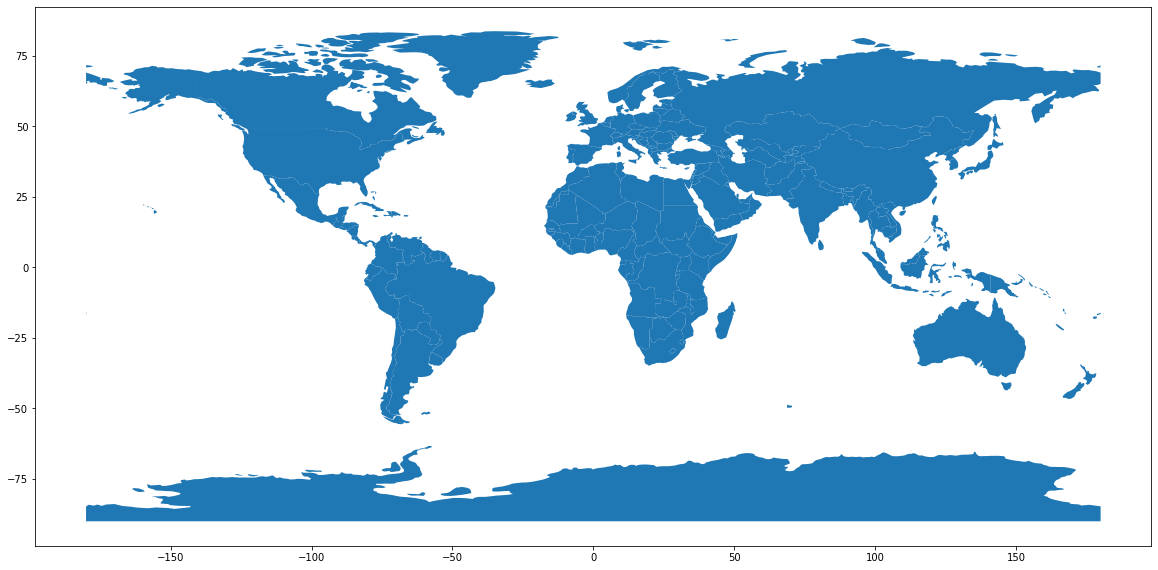

In [20]:
df_world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


df_world.plot(figsize=(20,30))



In [25]:
data = df.groupby('birth_country').agg({'id': 'count'}).reset_index()

In [26]:
# period = df[df['Period'] == 2018]
df_world_award_winners = df_world.merge(data, how="left", left_on=['name'], right_on=['birth_country'])

In [27]:
df_world_award_winners.head(10)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,birth_country,id
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",NaN,NaN
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,20.0
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States of America,274.0
5,18556698,Asia,Kazakhstan,KAZ,460700.0,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",NaN,NaN
6,29748859,Asia,Uzbekistan,UZB,202300.0,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",NaN,NaN
7,6909701,Oceania,Papua New Guinea,PNG,28020.0,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",NaN,NaN
8,260580739,Asia,Indonesia,IDN,3028000.0,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ...",NaN,NaN
9,44293293,South America,Argentina,ARG,879400.0,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,4.0


In [28]:
df_to_plot = df_world_award_winners[['geometry', 'id']]

Text(0.5, 1, 'Ganadores de premios nobel por pais')

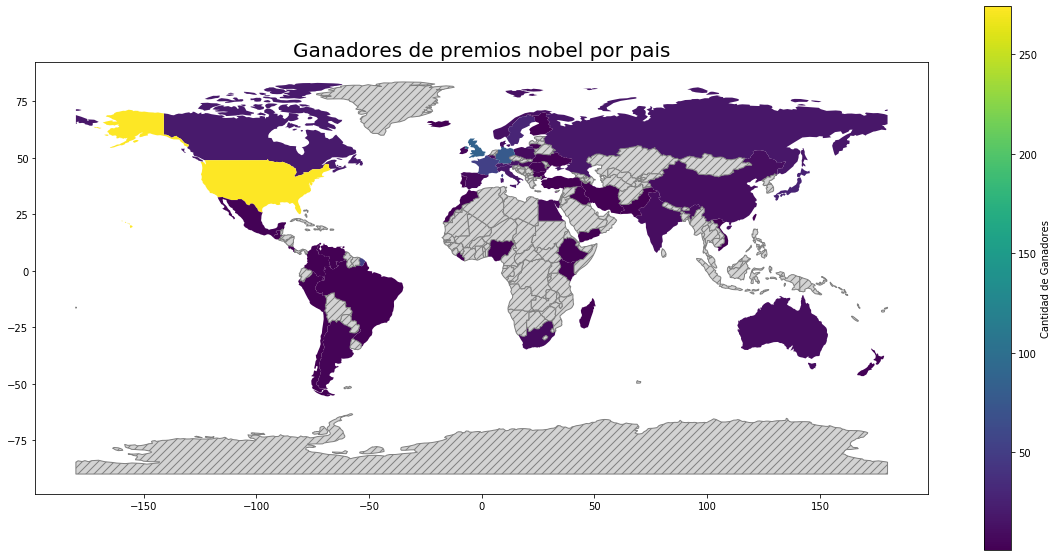

In [30]:
# fig, ax = plt.subplots(1, 1)
fig, ax = plt.subplots(figsize=(20,10))
df_to_plot.plot(column='id',
                ax=ax, 
                legend=True, 
                legend_kwds={'label': "Cantidad de Ganadores"},
                missing_kwds={
                   "color": "lightgrey",
                   "edgecolor": "grey",
                   "hatch": "///",
                   "label": "Missing values",
               })
# ax.set(title='Porcentaje de población \n con acceso a combustibles limpios y tecnología en 2018')
ax.set_title('Ganadores de premios nobel por pais', size=20)